 #### Import all necessary modules and packages

In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as sps
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
import statistics as stats
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sn

 #### Read in the dataset

In [19]:
co_data = pd.read_csv('QM_Assessment_1/coursework_1_data_2019.csv')

 #### Define a function which takes one variable and normalises it against another
 #### A boolean variable "standardise" enables a variable to also be standardised

In [20]:
def normalise_column(column_name1, column_name2, standardise = True):
    per_capita = co_data[column_name1] / co_data[column_name2]
    if standardise == True:
        rate = (per_capita - per_capita.mean()) / stats.stdev(per_capita)
        new_column_name = (column_name1+'_rate_standardised')
    else:
        rate = 100000 * per_capita
        new_column_name = (column_name1+'_per_100,000')
    co_data[new_column_name] = rate

co_data['average_pop'] = co_data[['2008_pop_total',
                                  '2013_pop_total',
                                  '2018_pop_total']].mean(axis=1)

 #### Create new columns for Condition X rates per 100,000

In [21]:
normalise_column('2008_cases_total', '2008_pop_total', standardise = False)
normalise_column('2013_cases_total', '2013_pop_total', standardise = False)
normalise_column('2018_cases_total', '2018_pop_total', standardise = False)
normalise_column('total_budget', 'average_pop', standardise = False)

 #### Create new columns for funding rates normalised

In [22]:
normalise_column('clean_air', 'average_pop')
normalise_column('clean_environ', 'average_pop')
normalise_column('health_training', 'average_pop')
normalise_column('school_awareness', 'average_pop')
normalise_column('media_awareness', 'average_pop')
normalise_column('sub_counselling', 'average_pop')

 #### Create for case rates in 2008 and 2018

In [23]:
cases_2008 = co_data['2008_cases_total_per_100,000']
cases_2018 = co_data['2018_cases_total_per_100,000']

 #### Create a new column for the decrease in childhood obesity rates from 2008 to 2018

In [24]:
rate_decrease = cases_2008 - cases_2018
co_data['rate_decrease_2008_to_2018'] = rate_decrease

 #### Get summary statistics for the newly created columns

In [25]:
co_data[['2008_cases_total_per_100,000', '2013_cases_total_per_100,000',
       '2018_cases_total_per_100,000', 'clean_air_rate_standardised',
       'clean_environ_rate_standardised', 'health_training_rate_standardised',
       'school_awareness_rate_standardised', 'media_awareness_rate_standardised',
       'sub_counselling_rate_standardised', 'total_budget_per_100,000', 'rate_decrease_2008_to_2018']].describe()

,"2008_cases_total_per_100,000","2013_cases_total_per_100,000","2018_cases_total_per_100,000",clean_air_rate_standardised,clean_environ_rate_standardised,health_training_rate_standardised,school_awareness_rate_standardised,media_awareness_rate_standardised,sub_counselling_rate_standardised,"total_budget_per_100,000",rate_decrease_2008_to_2018
count,152.000000,152.000000,152.000000,1.520000e+02,1.520000e+02,1.520000e+02,1.520000e+02,1.520000e+02,1.520000e+02,152.000000,152.000000
mean,309.725309,320.977802,344.672903,-2.337312e-17,2.045148e-17,5.112869e-17,4.090295e-17,1.037182e-16,-2.337312e-16,79999.496331,-34.947594
std,137.057961,139.095966,138.712226,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,36296.284520,25.197217
min,74.003594,41.928721,101.387631,-1.568363e+00,-2.035925e+00,-1.386223e+00,-1.112405e+00,-2.192766e+00,-2.308425e+00,63072.580772,-101.448482
25%,214.840762,226.885552,253.539159,-4.623359e-01,-6.232768e-01,-5.144004e-01,-3.593018e-01,-7.843396e-01,-7.745303e-01,71542.429461,-50.572878
50%,291.452425,298.483296,318.207213,-4.856257e-02,4.232942e-02,-4.621437e-02,-1.126702e-01,-1.852187e-03,-6.175206e-02,76984.188928,-31.373647
75%,365.028179,381.065807,406.703912,3.022960e-01,5.076946e-01,3.144941e-01,1.464103e-01,6.178164e-01,5.489758e-01,82101.000561,-17.688315
max,824.131604,849.613317,872.881356,9.501247e+00,7.477357e+00,9.732718e+00,1.066541e+01,3.113332e+00,4.548750e+00,511543.839307,63.338301


 #### Create a function which generates histograms

In [26]:
def histogram(xlabel, figure, height): # Expected input: column name from which to generate histogram, histogram number (figure), and height of y-axis

    data = co_data[xlabel]

    datamin = data.min()
    datamax = data.max()
    datamean = data.mean()
    datastd = data.std()
    n = len(data)

    hist_min = int(min(data)) - 1
    hist_max = int(max(data)) + 2
    x_range = [hist_min, hist_max]
    y_range = [0.0,height]

    n_cols = 12

    plt.figure(figure)
    data.hist(range=x_range, bins=n_cols, density=True)
    plt.ylim(y_range)
    plt.title(f'Density Histogram {str(figure)}:\n{xlabel}')
    plt.xlabel(xlabel)
    plt.ylabel('Density')

 #### Create new columns for the natural logs of cases rates

In [27]:
co_data['ln_cases_2008'] = np.log(co_data['2008_cases_total_per_100,000'])
co_data['ln_cases_2018'] = np.log(co_data['2018_cases_total_per_100,000'])

 #### Generate four histograms using the histogram() function for four sets of values from the data

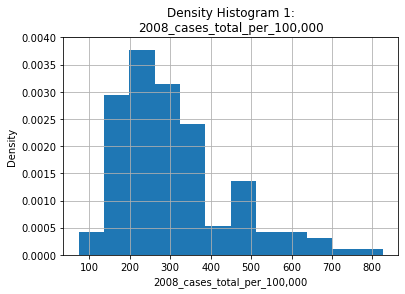

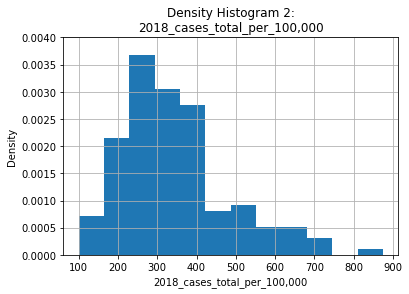

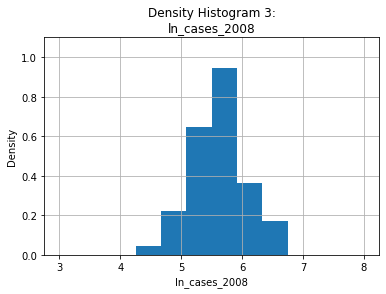

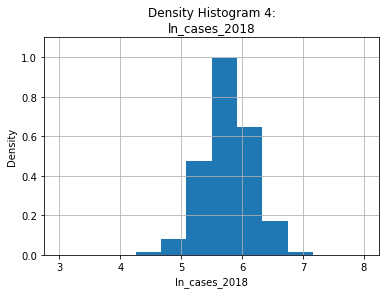

In [28]:
histogram('2008_cases_total_per_100,000', 1, 0.004)
histogram('2018_cases_total_per_100,000', 2, 0.004)
histogram('ln_cases_2008', 3, 1.1)
histogram('ln_cases_2018', 4, 1.1)

 #### Set alpha value in advance as a threshold for means comparison test

In [29]:
alpha = 0.05

#### Determine whether standard deviation of the two sets of values are similar

In [42]:
std_ratio = cases_2008.std()/cases_2018.std()

if std_ratio > 0.5 and std_ratio < 2:
    equal_stds = True
else:
    equal_stds = False

 #### Code for means comparison test and output

In [43]:
print("H0: Mean of 2008 population =  Mean of 2018 population")
print("H1: Mean of 2008 population != Mean of 2018 population")

test_stat, p_value = sps.ttest_ind(cases_2008,
                                   cases_2018,
                                   equal_var = equal_stds)
print("T Statistic =", test_stat)
print("p-value =", p_value)

if p_value < alpha:
    print(f"p-value < significance threshold of {alpha}.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

H0: Mean of 2008 population =  Mean of 2018 population
H1: Mean of 2008 population != Mean of 2018 population
T Statistic = -2.209525114815581
p-value = 0.027888280286754177
p-value < significance threshold of 0.05.
Reject H0. Accept H1.
Conclude that samples are drawn from populations with different means.


 #### Create function which carries out a VIF test and removes values until all values are below the threshold of 5

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        vif_df = vif_df.drop('const')
        
        # If the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('\nDropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            break

    return df

#### Create function which performs multiple linear regression of the change of childhood obesity rates on an inputted column of data

In [48]:
def multiple_regression(columns, dummies = True):
    
    if dummies == True: # If the input is a category variable column label, dummies are created from the categories
        data = pd.get_dummies(co_data[columns], columns = [columns])
        label = columns + " dummy"
    else:
        data = co_data[columns]
        label = 'Funding Areas'
    
    data_with_VIF = drop_column_using_vif(data)
    print(f"\nThe columns remaining after VIF selection are: \n\n{list(data_with_VIF.columns)}\n")
    
    model_co = sm.OLS(endog=co_data['rate_decrease_2008_to_2018'], exog=sm.add_constant(data_with_VIF)).fit()
    print(model_co.summary())
    
    plt.axhline(y=0.5, color='darkgray', linestyle='-')
    plt.scatter(model_co.fittedvalues, model_co.resid)
    plt.xlabel('Fitted Childhood Obesity Rate Decrease')
    plt.ylabel(f'Residual')
    plt.title(f'Residual vs. Fitted Plot of Childhood Obesity\nwith {label} variables')
    plt.show()

#### Create a series containing column names for funding rate values

In [49]:
funding_area_columns = ['clean_air_rate_standardised', 'clean_environ_rate_standardised',
                                          'health_training_rate_standardised', 'school_awareness_rate_standardised',
                                          'media_awareness_rate_standardised', 'sub_counselling_rate_standardised']

#### Perform three multiple regressions


The columns remaining after VIF selection are: 

['clean_air_rate_standardised', 'clean_environ_rate_standardised', 'health_training_rate_standardised', 'school_awareness_rate_standardised', 'media_awareness_rate_standardised', 'sub_counselling_rate_standardised']

                                OLS Regression Results                                
Dep. Variable:     rate_decrease_2008_to_2018   R-squared:                       0.163
Model:                                    OLS   Adj. R-squared:                  0.128
Method:                         Least Squares   F-statistic:                     4.701
Date:                        Mon, 15 Nov 2021   Prob (F-statistic):           0.000211
Time:                                15:21:33   Log-Likelihood:                -692.13
No. Observations:                         152   AIC:                             1398.
Df Residuals:                             145   BIC:                             1419.
Df Model:                            

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


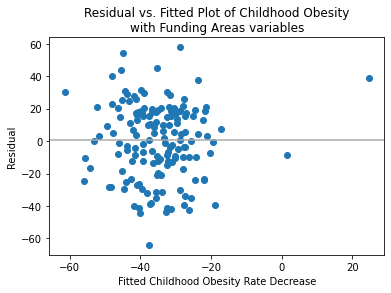

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)



Dropping: london_borough

The columns remaining after VIF selection are: 

['metropolitan_borough', 'non_metropolitan_county', 'other_london', 'unitary_authority']

                                OLS Regression Results                                
Dep. Variable:     rate_decrease_2008_to_2018   R-squared:                       0.533
Model:                                    OLS   Adj. R-squared:                  0.521
Method:                         Least Squares   F-statistic:                     42.00
Date:                        Mon, 15 Nov 2021   Prob (F-statistic):           1.90e-23
Time:                                15:21:33   Log-Likelihood:                -647.72
No. Observations:                         152   AIC:                             1305.
Df Residuals:                             147   BIC:                             1321.
Df Model:                                   4                                         
Covariance Type:                    nonrobust      

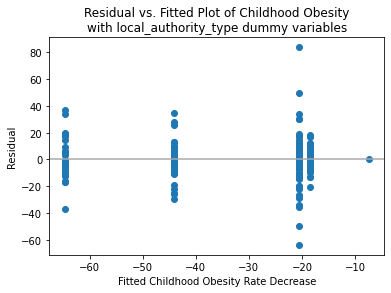

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)



Dropping: East Midlands

The columns remaining after VIF selection are: 

['East of England', 'London', 'North East', 'North West', 'South East', 'South West', 'West Midlands', 'Yorkshire and the Humber']

                                OLS Regression Results                                
Dep. Variable:     rate_decrease_2008_to_2018   R-squared:                       0.552
Model:                                    OLS   Adj. R-squared:                  0.527
Method:                         Least Squares   F-statistic:                     22.05
Date:                        Mon, 15 Nov 2021   Prob (F-statistic):           1.29e-21
Time:                                15:21:33   Log-Likelihood:                -644.58
No. Observations:                         152   AIC:                             1307.
Df Residuals:                             143   BIC:                             1334.
Df Model:                                   8                                         
Covariance

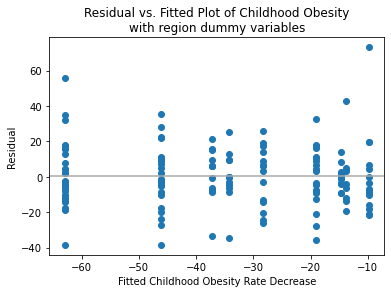

In [50]:
multiple_regression(funding_area_columns, dummies = False)
multiple_regression('local_authority_type')
multiple_regression('region')